In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("WH Report_preprocessed.csv")
df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


In [ ]:
#numeric vs numeric
def numeric_relations(column1,column2):
    

In [14]:
def hist_categorical_numeric(categorical_col,numeric_col,df):
    possibilities = df[categorical_col].unique()
    if len(possibilities) < 10:
        for pos in possibilities:
            BM = pos == df[categorical_col]
            plt.hist(df[BM][numeric_col], label= pos, histtype='step')
            plt.title("Step Hist"+categorical_col+" VS "+numeric_col)
        plt.legend()
        plt.show()

In [6]:
def differentiate_num_cat_cols(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'O']
    num_col = [col for col in df.columns if col not in cat_col]
    return cat_col,num_col

In [7]:
cat_cols,num_cols = differentiate_num_cat_cols(df)

In [8]:
cat_cols

['Name', 'Continent']

In [9]:
num_cols

['year',
 'population',
 'Life_Ladder',
 'Log_GDP_per_capita',
 'Social_support',
 'Healthy_life_expectancy_at_birth',
 'Freedom_to_make_life_choices',
 'Generosity',
 'Perceptions_of_corruption',
 'Positive_affect',
 'Negative_affect']

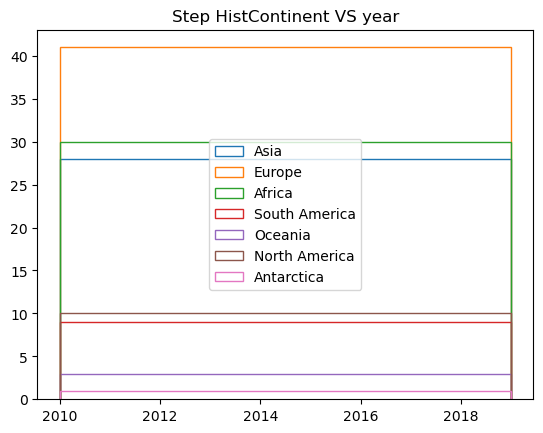

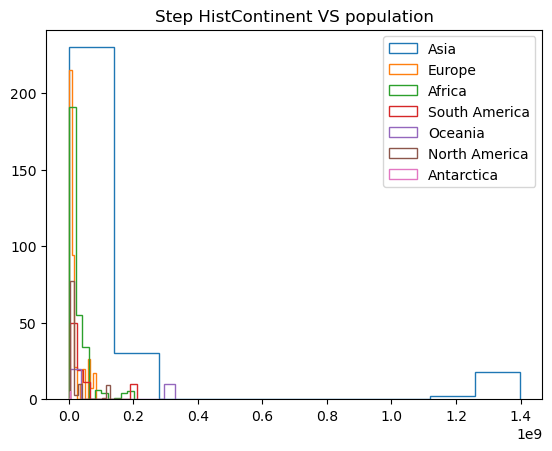

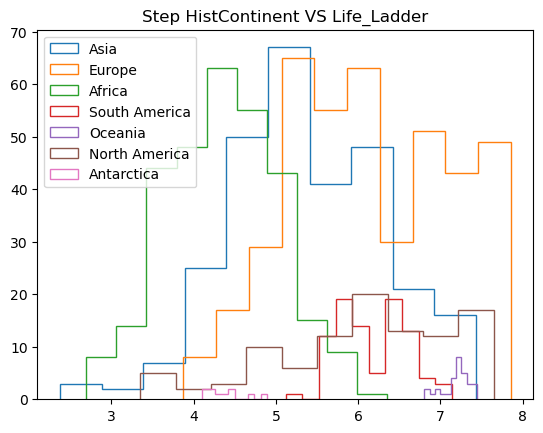

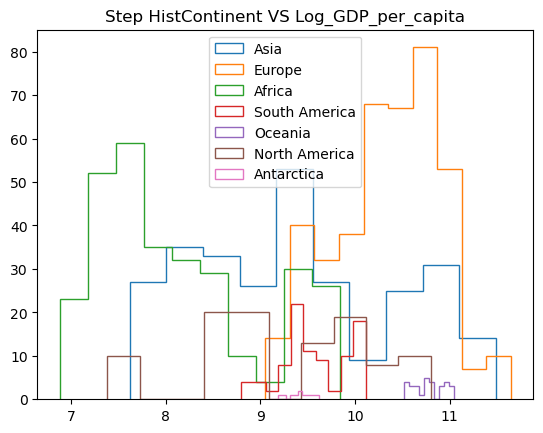

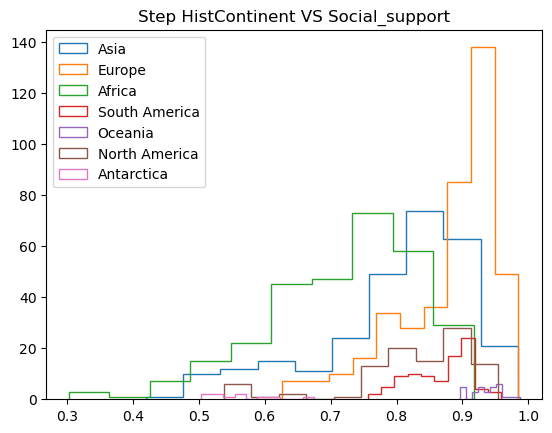

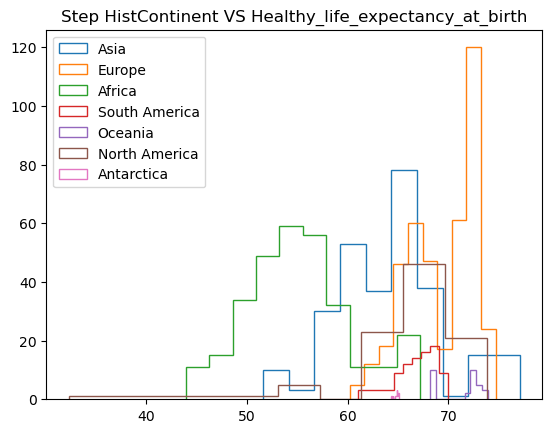

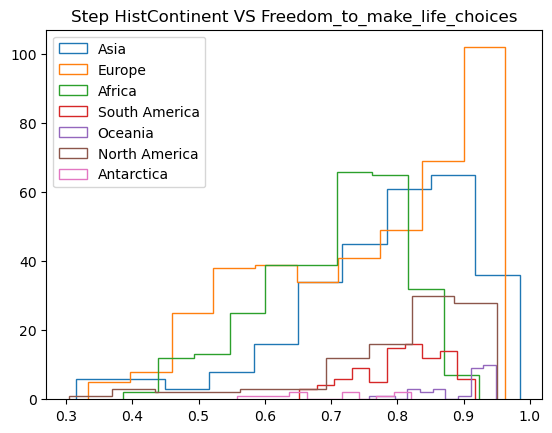

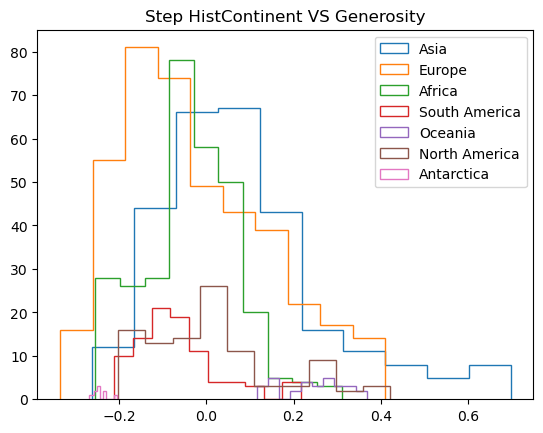

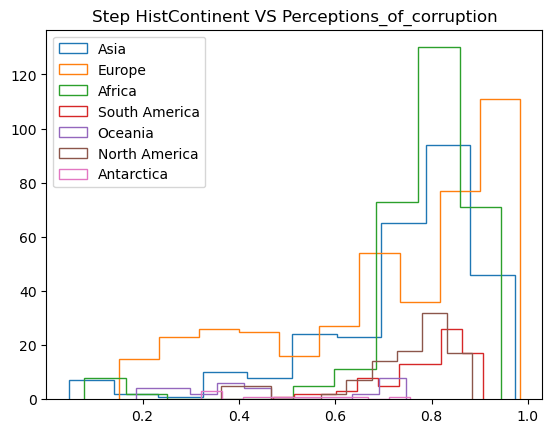

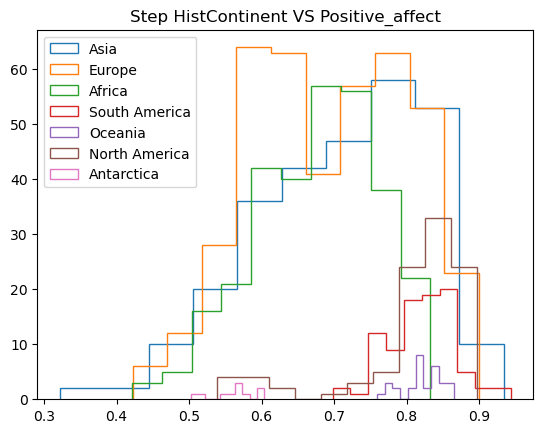

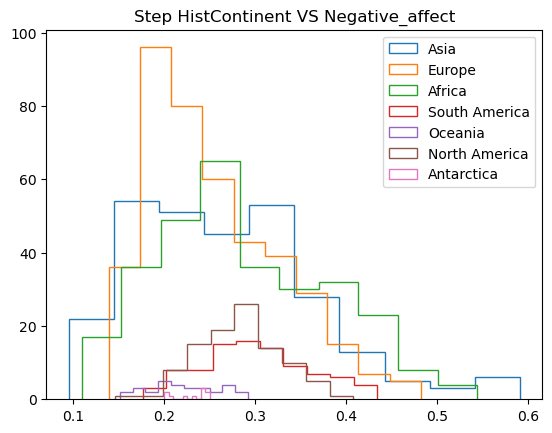

In [15]:
for cat_col in cat_cols:
    for num_col in num_cols:
        hist_categorical_numeric(cat_col,num_col,df)
        

In [31]:
def visualize_single_numeric(numeric_cols,df):
    l = len(numeric_cols)
    plt.figure(figsize= (2*l,l))
    for i,col in enumerate(numeric_cols):
        plt.subplot(2,l,i+1)
        plt.hist(df[col])
        # plt.xticks(np.linspace(10,100,11))
        plt.title(f"Histogram: {col}")
        plt.subplot(2,l,i+l+1)
        plt.boxplot(df[col], vert = False)
        # plt.yticks([1],[col])
        plt.title(f"Box Plot: {col}")
    plt.tight_layout()

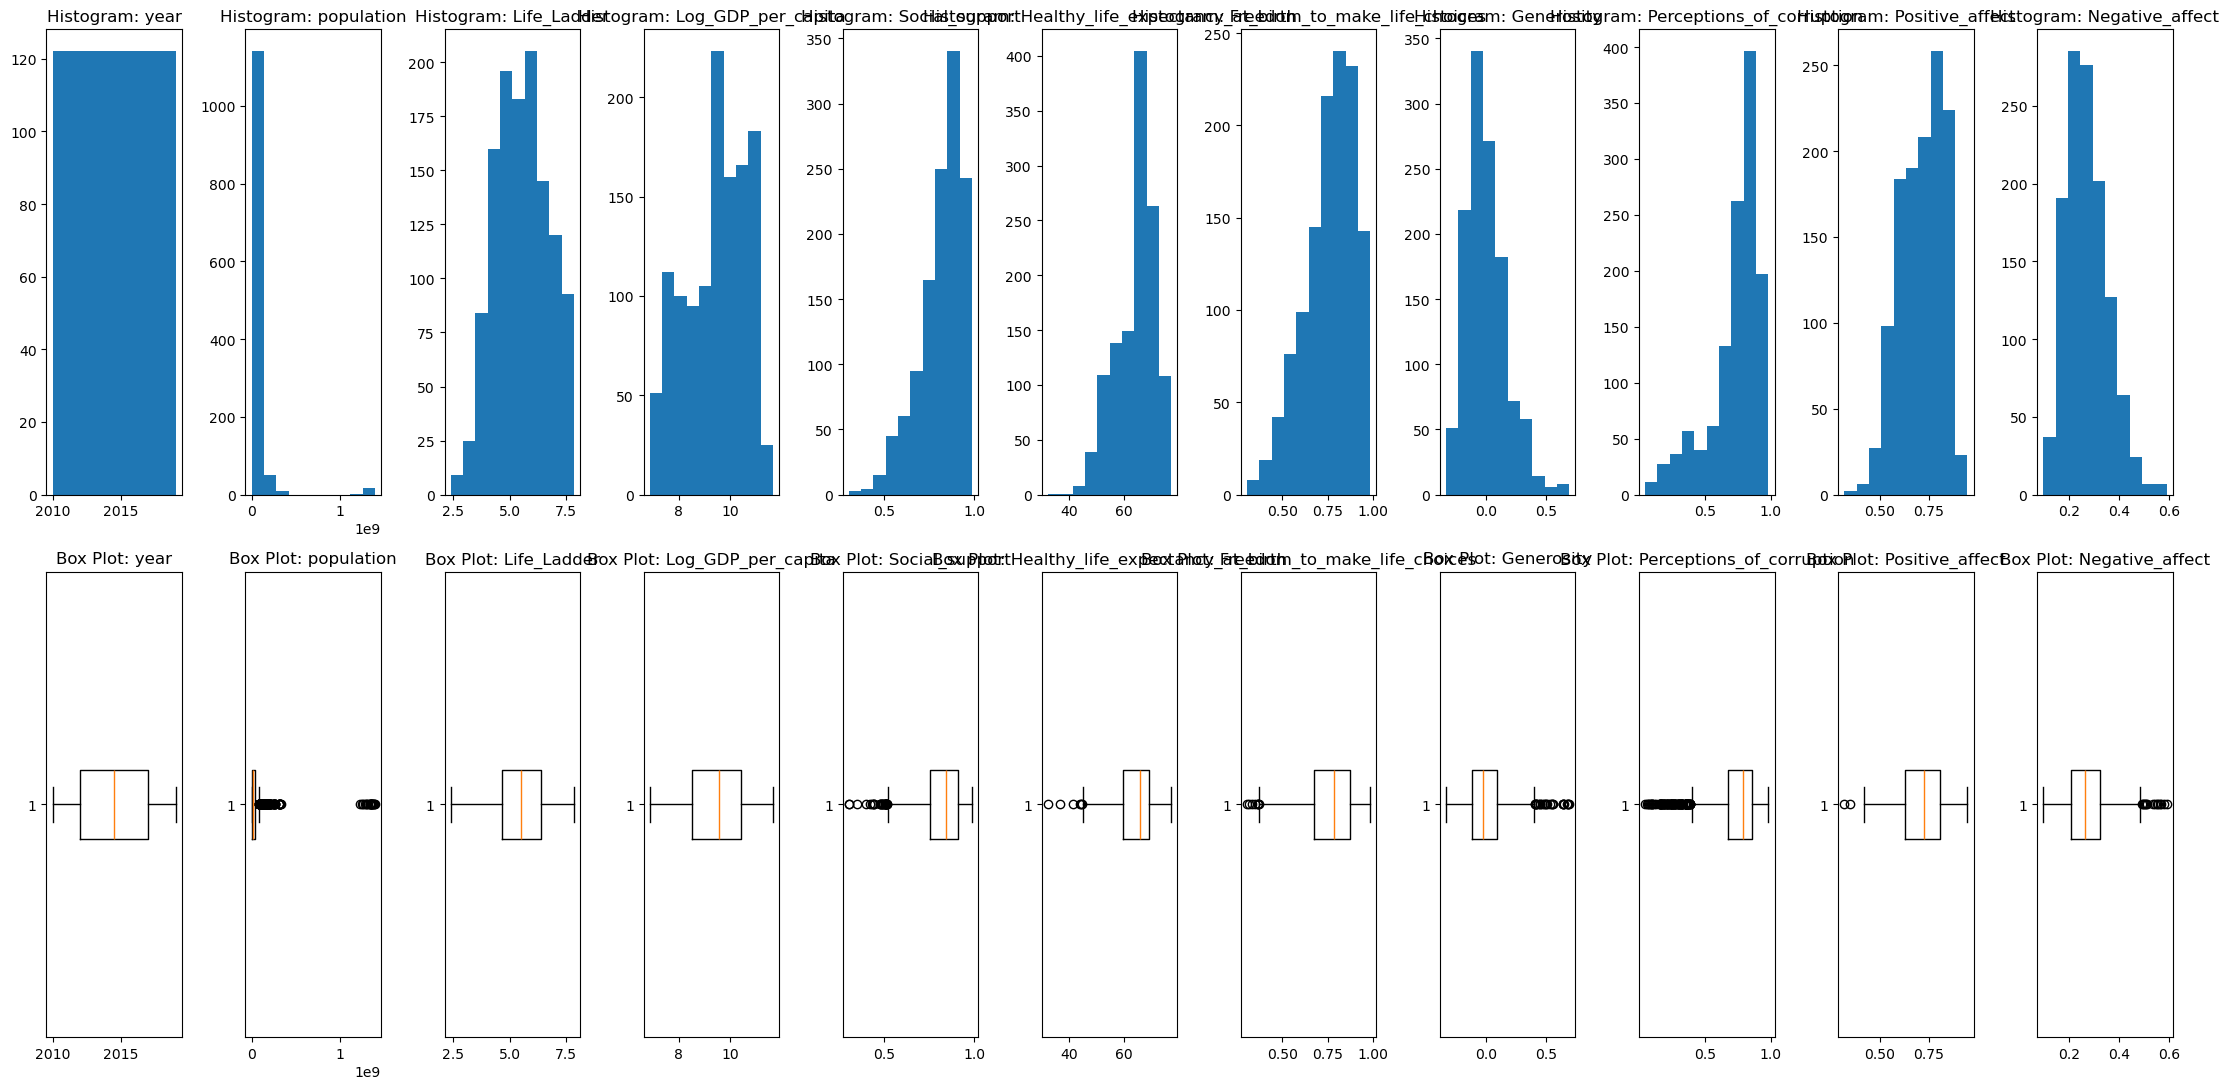

In [32]:
visualize_single_numeric(num_cols, df)

In [34]:
def scatter_vs_categotical(num_col1, num_col2, cat_col,df):
    cat_poss = df[cat_col].unique()
    if len(cat_poss) < 10:
        for poss in cat_poss:
            BM = df[cat_col] == poss
            X = df[BM][num_col1]
            y = df[BM][num_col2]
            plt.scatter(X,y)
            plt.title(num_col1 +" VS "+ num_col2 + " for year "+ poss)
        plt.show()
        plt.tight_layout()